In [1]:
# https://github.com/pytorch/examples/blob/master/mnist/main.py
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import PIL
from random import shuffle
from skimage.transform import resize
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB

In [ ]:
sites = [
	{"id": "1-800-flowers", "count" : 15,"label" : 0},
	{"id": "Alfred Sung", "count" : 15,"label" : 0},
	{"id": "Alibaba", "count" : 15,"label" : 1},
	{"id": "Amazon", "count" : 18,"label" : 1},
	{"id": "American Apparel", "count" : 15,"label" : 0},
	{"id": "Arngren", "count" : 15,"label" : 0},
	{"id": "Azteca Soccer", "count" : 15,"label" : 1},
	{"id": "Best Electronic", "count" : 17,"label" : 0},
	{"id": "BestBuy", "count" : 18,"label" : 1},
	{"id": "BigCommerce", "count" : 18,"label" : 1},
	{"id": "Blinkee", "count" : 16,"label" : 0},
	{"id": "Bliss", "count" : 15,"label" : 1},
	{"id": "BonBonBon", "count" : 19,"label" : 1},
	{"id": "Costco", "count" : 15,"label" : 0},
	{"id": "CruiseMaster", "count" : 15,"label" : 1},
	{"id": "Custom Barres", "count" : 15,"label" : 1},
	{"id": "CVS", "count" : 15,"label" : 0},
	{"id": "Decibullz", "count" : 15,"label" : 1},
	{"id": "DSW", "count" : 16,"label" : 0},
	{"id": "eBay", "count" : 16,"label" : 1},
	{"id": "Electrifying Times", "count" : 15,"label" : 0},
	{"id": "Fanatics", "count" : 15,"label" : 0},
	{"id": "Flipkart", "count" : 15,"label" : 1},
	{"id": "Footlocker", "count" : 15,"label" : 0},
	{"id": "Free City Supershop", "count" : 11,"label" : 0},
	{"id": "H & M", "count" : 19,"label" : 0},
	{"id": "Home Science Tools", "count" : 15,"label" : 1},
	{"id": "Ikea", "count" : 16,"label" : 0},
	{"id": "Jabong", "count" : 15,"label" : 1},
	{"id": "Jeep People", "count" : 15,"label" : 1},
	{"id": "Koi Computer", "count" : 15,"label" : 1},
	{"id": "Lazada", "count" : 16,"label" : 1},
	{"id": "Ling's Cars", "count" : 15,"label" : 0},
	{"id": "Mednat", "count" : 15,"label" : 0},
	{"id": "Mercia Tourist Board", "count" : 12,"label" : 0},
	{"id": "Microcenter.com", "count" : 18, "label" : 0},
	{"id": "Next Chapter", "count" : 15,"label" : 1},
	{"id": "Nordstrom", "count" : 16,"label" : 0},
	{"id": "Opensky", "count" : 15,"label" : 0},
	{"id": "P & M Computers", "count" : 15,"label" : 0},
	{"id": "Paradise With A View", "count" : 15,"label" : 0},
	{"id": "Pennyjuice", "count" : 12,"label" : 0},
	{"id": "Rakuten", "count" : 19,"label" : 0},
	{"id": "RalphLauren.com", "count" : 19,"label" : 0},
	{"id": "Renogy", "count" : 16,"label" : 1},
	{"id": "Rusty Surfboards", "count" : 15,"label" : 1},
	{"id": "Shopee", "count" : 16,"label" : 1},
	{"id": "Shopify", "count" : 15,"label" : 1},
	{"id": "Signal Boosters", "count" : 15,"label" : 1},
	{"id": "Skullcandy", "count" : 16,"label" : 1},
	{"id": "SnapDeal", "count" : 15,"label" : 1},
	{"id": "Suzanne Collins Books", "count" : 15,"label" : 0},
	{"id": "The Mountain", "count" : 18,"label" : 1},
	{"id": "True Links Wear", "count" : 16,"label" : 1},
	{"id": "Urban Outfitters", "count" : 15,"label" : 0},
	{"id": "Walgreens", "count" : 16,"label" : 0},
	{"id": "Walmart", "count" : 15,"label" : 1},
	{"id": "Water Equipment", "count" : 18,"label" : 0},
	{"id": "Woocommerce", "count" : 15,"label" : 1},
	{"id": "Zalora", "count" : 16,"label" : 1}   
]

In [ ]:
folds = [[] for i in range(5)]
good = [x for x in sites if x["label"] == 1]
bad = [x for x in sites if x["label"] == 0]
shuffle(good)
shuffle(bad)
for i in range(30):
    folds[i//6].append(good[i])
    folds[i//6].append(bad[i])

for i in range(5):
    print("Fold",i);
    for j in folds[i]:
        print(j["id"],j["count"],j["label"])
    print()

In [ ]:
# data = [[] for i in range(5)]
# labels = [[] for i in range(5)]
# sum = 0
# for i in range(0,5):
#     for site in folds[i]:
#         sum += site["count"]
#         for j in range(1,site['count'] + 1):
# #         for i in range(1,2):
#             labels[i] = labels[i] + [site["label"]]
#             temp = PIL.Image.open("%s/%s - %02d.png" % (site['id'],site['id'],j))
#             temp = np.array(temp);
#             temp = resize(temp, (temp.shape[0] // 2, temp.shape[1] // 2), anti_aliasing=True)
#             data[i].append(temp)
#             print("Loading %s/%s - %02d.png" % (site['id'],site['id'],j))
# print("Loaded %d screens." % sum)
# print(labels)

In [2]:
import pickle

In [ ]:
# with open('data.pt', 'wb') as f:
#     pickle.dump(data, f)
    
# with open('labels.pt', 'wb') as f:
#     pickle.dump(labels, f)

In [3]:
with open('data.pt', 'rb') as f:
    data = pickle.load(f)
    
with open('labels.pt', 'rb') as f:
    labels = pickle.load(f)

In [4]:
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j] = data[i][j].reshape((786816,))
#         print(data[i][j].shape)

In [ ]:
avedacc, avevacc = 0,0

for i in range(5):
    model = GaussianNB()
    print("Fold %d" % (i + 1))
    trainX = []
    trainY = []
    testX = []
    testY = []
    for j in range(5):
        if i != j:
            trainX = trainX + data[j]
            trainY = trainY + labels[j]
        else:
            testX = data[j]
            testY = labels[j]
    trainX = np.array(trainX)
    trainY = np.array(trainY)
    testX = np.array(testX)
    testY = np.array(testY)
#     print(trainX.shape)
#     print(trainY.shape)
#     print(testX.shape)
#     print(testY.shape)
    
    
    model.fit(trainX,trainY)
    
    train_out = model.predict(trainX)
    test_out = model.predict(testX)
    folddacc = np.mean(train_out == trainY)
    foldvacc = np.mean(test_out == testY)
    print("Fold Train Accuracy {:.6f} Fold Test Accuracy {:.6f}".format(folddacc,foldvacc))
    avedacc += folddacc
    avevacc += foldvacc

avedacc /= 5
avevacc /= 5
print("Average Train Accuracy: {:.6f}\nAverage Test Accuracy: {:.6f}\n".format(avedacc,avevacc))

In [5]:
avedacc, avevacc = 0,0

model = GaussianNB()
print("Fold %d" % (i + 1))
trainX = []
trainY = []
testX = []
testY = []
for j in range(5):
    trainX = trainX + data[j]
    trainY = trainY + labels[j]
trainX = np.array(trainX)
trainY = np.array(trainY)

model.fit(trainX,trainY)

train_out = model.predict(trainX)
temp_out = model.predict_proba(trainX)
folddacc = np.mean(train_out == trainY)
print("Fold Train Accuracy {:.6f} ".format(folddacc))

Fold 5


AttributeError: 'GaussianNB' object has no attribute 'predict_probs'

In [8]:
with open('naivebayesoutprobs.pt', 'wb') as f:
    pickle.dump(temp_out[:,1], f)

Confusion matrix, without normalization
[[229 236]
 [102 371]]
Normalized confusion matrix
[[0.49 0.51]
 [0.22 0.78]]


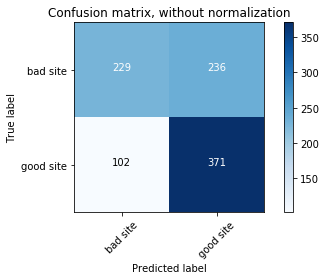

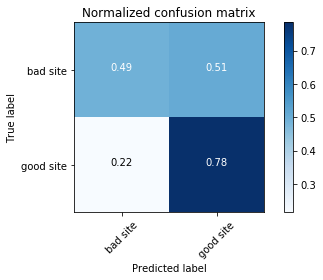

Accuracy: 0.6397


In [5]:
from sklearn.metrics import *
import itertools
import pickle
with open('naivebayesout.pt', 'rb') as f:
    y_pred = pickle.load(f)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


y_test = np.array([])

for x in labels:
    y_test = np.append(y_test,x)

class_names = ["bad site","good site"]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print("Accuracy: {:.4f}".format(np.mean(y_test==y_pred)))